# LAD train/test/validation

## Init

In [1]:
from sklearn import linear_model

from f_data_prep import *
from f_drosophila_infer import *
from f_train import *

In [2]:
with open('./pickles/LAD_quad_cellselect.pkl', 'rb') as f:
    LAD_quad = pickle.load(f)
    
# with open('./pickles/LAD_quad_ttv.pkl', 'rb') as f:
#     LAD_quad_v = pickle.load(f)

## Results

### LAD vs. LAD_v

In [3]:
# def quad(X):
#     quad = np.copy(X)
#     if X.shape[1] == 27:
#         for i in range(X.shape[1]-1):
#             for j in range(i+1, X.shape[1]):
#                 quad = np.hstack((quad, (X[:,i]*X[:,j])[:,None]))
#     if X.shape[1] == 99:
#         for i in range(len(comp_ind)-1):
#             for j in range(i+1, len(comp_ind)):
#                 quad = np.hstack((quad, (X[:,comp_ind[i]]*X[:,comp_ind[j]])[:,None]))
#     return quad

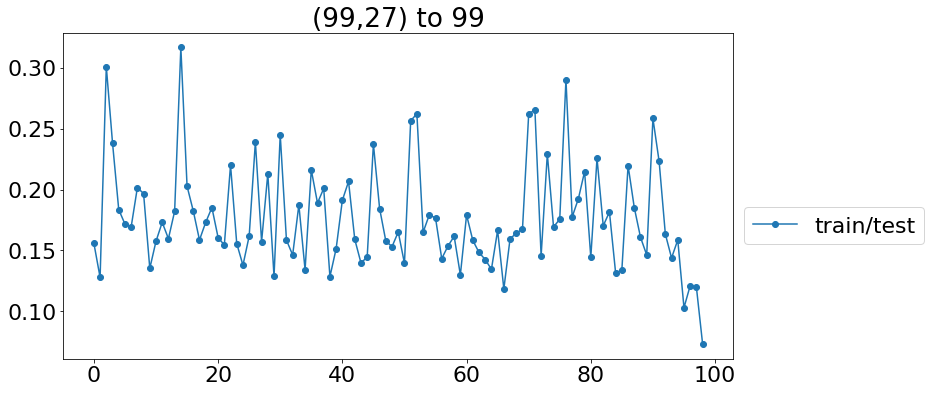

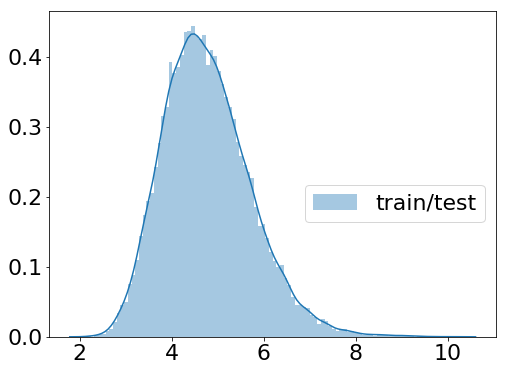

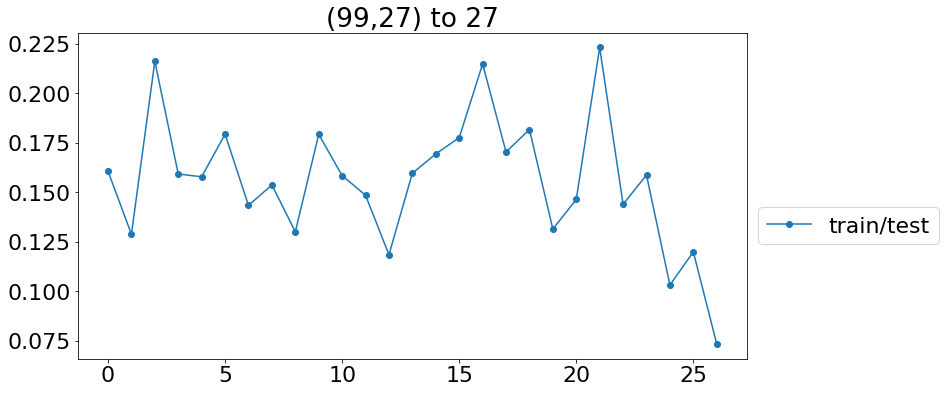

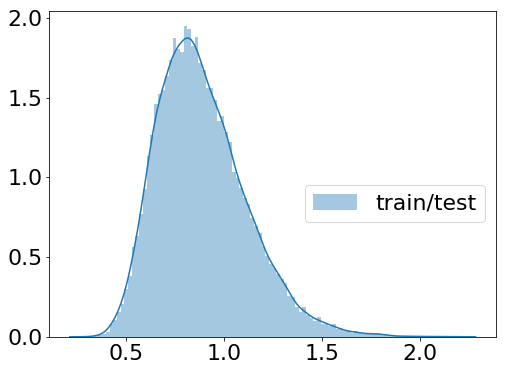

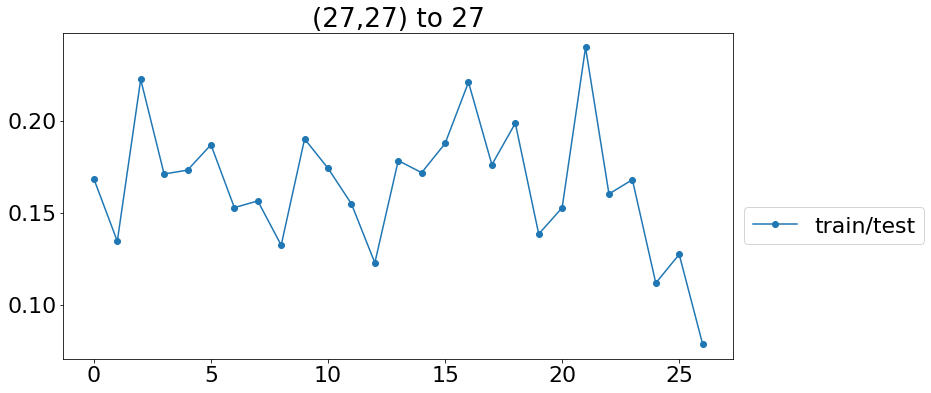

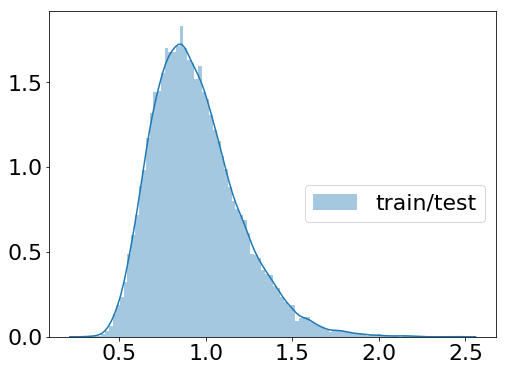

In [5]:
import seaborn as sns

matplotlib.rcParams.update({'font.size': 22})
title=['(99,27) to 99', '(99,27) to 27', '(27,27) to 27']
for i in range(3):
    plt.figure(figsize=(12,6))
    plt.plot(range(len(LAD_quad_v[i]['ferror'])), LAD_quad_v[i]['ferror'], 'o-', label='train/test/validation')
    if i == 0:
        plt.plot(comp_ind, LAD_quad_v[i]['ferror'][comp_ind], 'ro')
    ferror = np.mean(LAD_quad[i]['ferror'], axis=0)
    plt.plot(range(len(ferror)), ferror, 'o-', label='train/test')
    plt.legend(bbox_to_anchor=(1,0.5))
    plt.title(title[i])
    
    plt.figure(figsize=(8,6))
    error_l1 = np.sum(LAD_quad_v[i]['error_cell_l1'], axis=1)
    sns.distplot(error_l1, bins=100, label='train/test/validation')
    sns.distplot(np.hstack(LAD_quad[i]['error_cell_l1']), bins=100, label='train/test')
    plt.legend(bbox_to_anchor=(1,0.5))
    print(stats.mannwhitneyu(error_l1, np.hstack(LAD_quad[i]['error_cell_l1'])))
plt.show()

### LAD_v: (99,27) to 27 vs. (27,27) to 27

In [ ]:
plt.figure(figsize=(12,6))
labels=['(99,27) to 27', '(27,27) to 27']
for i in range(1,3):
    plt.plot(range(27), LAD_quad_v[i]['ferror'], 'o-', label=labels[i-1])
    plt.legend(bbox_to_anchor=(1,0.5))
plt.show()